In [285]:
import numpy as np #numpy arrays
import torch #Pytorch
import torchvision #lets PyTorch read images
import matplotlib.pyplot as plt #graphing library
from time import time #timers etc.
from torchvision import datasets, transforms #letting you import and transform datasets like MNIST
from torch import nn, optim #neural network functionality- neural network and optimisation

In [286]:
transform = transforms.Compose([transforms.ToTensor(), #transforming images into tensors. Transforms.Compose() just lets you make groups of transformations of data
                              transforms.Normalize((0.5,), (0.5,)), #normalises the tensor
                              ])

In [287]:
#download the data sets, shuffle them and transform each of them using the transformation we outlined above
trainset = datasets.FashionMNIST('../MNIST', download=True, train=True, transform=transform)
valset = datasets.FashionMNIST('../MNIST', download=True, train=False, transform=transform)

#DataLoader combines the data-set and a sampler and provides single- or multi-process iterators over the data-set
trainloader = torch.utils.data.DataLoader(trainset, batch_size=101, shuffle=True) #batch_size is the number of images to read in one go.
valloader = torch.utils.data.DataLoader(valset, batch_size=101, shuffle=True)

torch.Size([101, 1, 28, 28])
torch.Size([101])


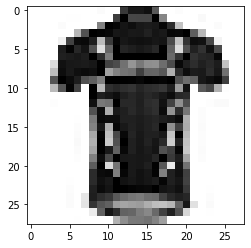

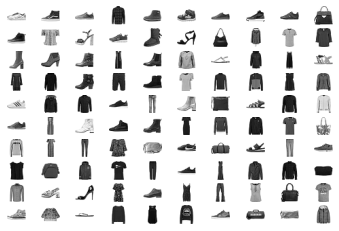

In [288]:
'''GETTING TO KNOW THE DATASET'''
dataiter = iter(trainloader) #this shows that each batch has 64 images, 28 pixels by 28 pixels
images, labels = dataiter.next() #creates images and labels "lists"??? images is later referenced below as a way to access the images

print(images.shape) #prints out the shape of the images- 64 images that are 28 by 28 each.
print(labels.shape) #prints out how many labels we have- 64 per batch.
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r'); #prints out the first image of the dataset- this changes each time because it gets shuffled

#displaying more images
figure = plt.figure() #creates a figure to put images in
num_of_images = 100
for i in range(1, num_of_images + 1):
    plt.subplot(10, 10, i) #6 by 10 table, we are working with the one at location of i
    plt.axis('off') #turns off the axes?
    plt.imshow(images[i].numpy().squeeze(), cmap='gray_r') #shows image at location of i, squeeze seems to be a way to eliminate extra data, cmap='gray_r' makes them grayscale

In [289]:
input_size = 784 #this shows that each image has 784 pixels, so that's the input size for the network
hidden_sizes = [128, 64] #sizes of the hidden layers- goes from 784 down to 128, down to 64, down to 10 then to 1
output_size = 10 #there are 10 options for what digit it could be
model = torch.load('my_mnist_model.pt')
'''model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]), #creates a layer of the network going from 784 down to 128
                      nn.ReLU(), #activation function on the output of the input layer
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]), #creates a layer of the network going from 128 down to 64
                      nn.ReLU(), #activation function on the first layer
                      nn.Linear(hidden_sizes[1], output_size), #creates a layer of the network going from 64 down to 10
                      nn.LogSoftmax(dim=1)) #softmax function on the output layer, giving you the answer'''
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [290]:
'''LOSS FUNCTION'''
criterion = nn.NLLLoss() #neural network loss function
images, labels = next(iter(trainloader)) #moves onto the next image + label
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities of each output
loss = criterion(logps, labels) #calculate the NLL loss

In [291]:
#ADJUSTING WEIGHTS
print('Before backward pass: \n', model[0].weight.grad) #before, they're set to none
loss.backward() #function going back and adjusting weights
print('After backward pass: \n', model[0].weight.grad) #prints out the new weights

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [ 0.0027,  0.0027,  0.0027,  ...,  0.0027,  0.0027,  0.0027],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        ...,
        [-0.0100, -0.0100, -0.0100,  ..., -0.0100, -0.0100, -0.0100],
        [ 0.0027,  0.0027,  0.0027,  ...,  0.0027,  0.0027,  0.0027],
        [-0.0091, -0.0091, -0.0091,  ..., -0.0091, -0.0091, -0.0091]])


In [292]:
'''TRAINING'''
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9) #optimizer changes weights and biases
'''
time0 = time() #tracking time it took to train
epochs = 30 #number of times we run over the entire dataset
for e in range(epochs): #repeat for each epoch
    running_loss = 0
    for images, labels in trainloader: #repeat for each image in the training data
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)
'''

'\ntime0 = time() #tracking time it took to train\nepochs = 30 #number of times we run over the entire dataset\nfor e in range(epochs): #repeat for each epoch\n    running_loss = 0\n    for images, labels in trainloader: #repeat for each image in the training data\n        # Flatten MNIST images into a 784 long vector\n        images = images.view(images.shape[0], -1)\n    \n        # Training pass\n        optimizer.zero_grad()\n        \n        output = model(images)\n        loss = criterion(output, labels)\n        \n        #This is where the model learns by backpropagating\n        loss.backward()\n        \n        #And optimizes its weights here\n        optimizer.step()\n        \n        running_loss += loss.item()\n    else:\n        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))\nprint("\nTraining Time (in minutes) =",(time()-time0)/60)\n'

In [293]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(images[0].numpy().squeeze(), cmap='gray_r');
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Item = pullover


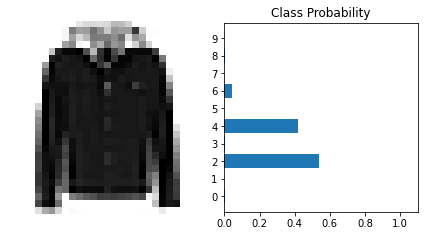

In [296]:
images, labels = next(iter(valloader))
img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])

digit = probab.index(max(probab))
if digit == 0:
    clothingItem = "top"
elif digit == 1:
    clothingItem = "pants"
elif digit == 2:
    clothingItem = "pullover"
elif digit == 3:
    clothingItem = "dress"
elif digit == 4:
    clothingItem = "coat"
elif digit == 5:
    clothingItem = "sandal"
elif digit == 6:
    clothingItem = "shirt"
elif digit == 7:
    clothingItem = "sneaker"
elif digit == 8:
    clothingItem = "bag"
elif digit == 9:
    clothingItem = "boot"

print("Predicted Item =", clothingItem)
view_classify(img.view(1, 28, 28), ps)

In [295]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
model_accuracy = (correct_count/all_count) * 100
print("\nModel Accuracy =", str(model_accuracy) + "%")

Number Of Images Tested = 10000

Model Accuracy = 87.82%
